<a href="https://colab.research.google.com/github/Ayanlola2002/Data-Science-Nigeria/blob/master/Copy_of_DSN_BOOTCAMP_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#mounting Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [64]:
train_df=pd.read_csv('/content/drive/My Drive/DSN_BOOTCAMP/Train.csv')
test_df=pd.read_csv('/content/drive/My Drive/DSN_BOOTCAMP/Test.csv')

In [65]:

train_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.000,0.285,1.656,0.000,0.000,0.000,10689720.000,252072.000,4272776.000,11333126.000,4397256.000,2301324.000,7875694.000,96375139,112181765.000,1.000,1.000,1.000,3.000,3.000,134.655,nan,nan,134.655,4000.500,17064.000,11376.000,60.000,17064.000,5962.000,nan,1052.000,8.000,2.000,nan,12.000,12.000,4.000,0.000,nan,nan,0.393,2.020,0.712,0.000,0.000,charge,nan,1.130,0.044,no
1,Apcnt_1000004,3456.000,0.674,0.234,0.000,0.000,0.000,898979.000,497531.000,9073814.000,2533168.000,244292.000,3982971.000,2141445.000,28141427,45169902.000,1.000,1.000,1.000,2.000,2.000,109.230,11385.240,14584.290,86.685,4161.000,13413.000,8942.000,304.000,13413.000,5780.000,nan,2554.000,17.500,0.000,0.000,16.000,24.000,8.000,0.000,nan,nan,0.314,8.080,0.184,nan,0.000,charge,349.806,1.620,0.322,no
2,Apcnt_1000008,3276.000,0.538,3.151,0.000,6.282,nan,956940.000,nan,192944.000,1079864.000,nan,nan,0.000,16576457,22452691.000,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,1597.500,4746.000,3164.000,60.000,15696.000,nan,14508.000,70.000,0.667,0.000,nan,12.000,0.000,6.000,0.000,149.680,nan,0.163,18.180,0.791,0.000,0.000,charge,nan,1.513,0.012,yes
3,Apcnt_1000012,3372.000,0.170,0.505,0.000,0.000,192166.000,3044703.000,385499.000,3986472.000,3621979.000,nan,771776.000,1186839.000,48187375,136297820.000,0.000,0.000,0.000,1.000,1.000,120.120,8580.000,0.000,85.800,1701.000,4014.000,2676.000,60.000,11679.000,nan,nan,522.000,7.833,1.000,1.000,4.000,8.000,4.000,1.000,nan,nan,0.489,2.020,0.685,nan,0.000,charge,89.940,0.664,0.083,no
4,Apcnt_1000016,3370.000,0.773,1.101,0.000,0.000,1556.000,214728.000,214728.000,1284089.000,361770.000,396391.000,818456.000,511535.000,28141427,15292757.000,0.000,0.000,0.000,3.000,3.000,104.535,8360.190,10326.450,115.335,1551.000,3285.000,2190.000,60.000,19437.000,12958.000,5202.000,272.000,1.000,0.000,0.000,24.000,2.000,24.000,0.000,150.013,nan,0.275,12.120,0.438,0.000,0.000,charge,97.888,1.428,0.046,no


In [66]:
test_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.000,0.349,10.201,0.000,0.000,418564.000,418564.000,418564.000,540710.000,0.000,1649749.000,5446.000,0.000,48187375,114686147.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,1086.000,6204.000,2676.000,60.000,14691.000,9794.000,nan,238.000,1.833,0.000,nan,22.000,2.000,14.000,0.000,nan,nan,0.825,1.010,0.800,nan,0.000,charge,nan,0.000,0.011
1,Apcnt_1000048,3284.000,1.274,2.961,9.020,0.000,0.000,9858816.000,49014.000,1510098.000,18308285.000,622789.000,1025793.000,1396510.000,34694910,87479487.000,1.000,1.000,1.000,2.000,2.000,142.560,nan,nan,570.585,3082.500,10221.000,6814.000,60.000,11955.000,3528.000,nan,1216.000,19.500,3.000,nan,30.000,18.000,14.000,2.000,nan,18.841,0.508,4.040,0.623,1.000,0.000,lending,nan,0.505,0.044
2,Apcnt_1000052,nan,0.275,0.060,0.000,0.000,nan,nan,nan,nan,0.000,118256.000,nan,nan,21973443,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,852.000,4836.000,nan,nan,nan,7.833,0.000,nan,2.000,nan,0.000,nan,nan,nan,nan,0.000,nan,nan,nan,charge,nan,0.000,nan
3,Apcnt_1000076,3232.000,0.285,2.803,0.000,0.000,0.000,473802.000,473802.000,1724437.000,493641.000,1391064.000,1176725.000,1220293.000,16576457,nan,2.000,2.000,2.000,3.000,3.000,109.005,13050.000,nan,109.005,1414.500,4197.000,2798.000,60.000,14964.000,nan,nan,248.000,9.000,1.000,1.000,36.000,0.000,26.000,0.000,nan,nan,0.917,2.020,0.464,nan,nan,charge,90.164,0.789,0.104
4,Apcnt_1000080,3466.000,2.095,0.832,2.518,0.000,19839.000,1150662.000,1150662.000,7860523.000,5752921.000,271133.000,613064.000,4779643.000,48187375,72049802.000,0.000,0.000,0.000,3.000,3.000,139.065,469.290,469.290,15.180,2724.000,9855.000,6570.000,182.000,11679.000,5900.000,nan,2388.000,16.667,1.000,0.000,24.000,28.000,20.000,0.000,nan,nan,0.234,23.230,0.727,0.000,0.000,lending,1303.587,1.638,0.163


In [67]:

print(train_df.shape)
print(test_df.shape)

(56000, 52)
(24000, 51)


In [68]:
Application_id=test_df['Applicant_ID']

In [69]:
train_df.default_status.unique()

array(['no', 'yes'], dtype=object)

In [70]:
#target varriable
train_df.loc[train_df.default_status=='no','default_status']=0
#target varriable
train_df.loc[train_df.default_status=='yes','default_status']=1

In [71]:
#saving the order Id column and predictor column
#Application_id=test_df['Applicant_ID']
y_train=train_df.iloc[:,-1].astype('int')

In [72]:
y_train

0        0
1        0
2        1
3        0
4        0
        ..
55995    0
55996    1
55997    0
55998    0
55999    0
Name: default_status, Length: 56000, dtype: int64

In [73]:
#type(train_df.isnull().sum())
train_df.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [75]:
train_df.form_field40.unique()
#fill form_field40 with mean,median

array([     nan, 149.6805, 150.0135, ..., 110.334 , 178.371 , 158.025 ])

In [76]:
train_df.form_field47.unique()

array(['charge', 'lending'], dtype=object)

In [77]:
train_df.form_field31.unique()
#mean,median
#its also better to check the distribution with respect to some other fields.
#bivariate analysis

array([   nan, 14508.,  5202., 13413.,   273., 17430., 21990., 15879.,
       11499.,  8031., 31845., 17703., 12684., 13506.,  8943.,  4014.,
       14874.,  1917.,  9945.,  8121.,  5019.,  6024., 11955., 17064.,
       10767., 12867.,  5748.,  6114., 16152., 10584.,  6936.,  3834.,
       22629.,  6204., 10494., 15057., 15969., 21354., 20622., 18069.,
        3468.,  8670., 12135., 23451.,  4746., 10311., 16974.,  7299.,
       16791., 13869., 10404., 10677.,  5385., 10128.,  9489., 15786.,
       11316.,   822., 11772., 13140.,  8577., 12318.,  3375.,  7026.,
        6570.,  2829.,  7755.,  9399., 22083.,  1368., 10038.,   456.,
        2556., 14145.,  9765., 15696., 13779., 15603.,  1185., 15513.,
       20805.,  4929.,  2463., 14418.,  7119.,  6297., 19164., 19983.,
        8304.,  3741., 20349.,  6753.,  4653., 11679., 12501.,   729.,
       18798., 10221., 29019., 11406., 27465.,  7575., 25368., 21810.,
       14235., 17154.,  9672.,  4470., 21444., 23724., 11589.,  5109.,
      

In [78]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_df.drop("Applicant_ID", axis = 1, inplace = True)
test_df.drop("Applicant_ID", axis = 1, inplace = True)

In [79]:
# let's delete the last column from the dataset to  concat train and test
train_df = train_df.drop(['default_status'], axis = 1)

In [80]:
train_df.shape

(56000, 50)

In [81]:
# lets concat the train and test sets for preprocessing and visualizations
all_data = pd.concat([train_df, test_df], axis = 0)

# let's check the shape
all_data.shape

(80000, 50)

In [82]:
#separate categorical varriable from numerical varriable
data_numeric =all_data[[f for f in all_data.columns if all_data.dtypes[f] != 'object']]


data_categorical =pd.DataFrame(all_data[[f for f in all_data.columns if all_data.dtypes[f] == 'object']],columns=['form_field47'])


In [83]:
data_categorical

,form_field47
0,charge
1,charge
2,charge
3,charge
4,charge
...,...
23995,charge
23996,charge
23997,charge
23998,charge


In [85]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(missing_values=np.nan, strategy='mean')
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns
#you could do something like one-hot-encoding of data_categorical here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_categorical['form_field47'] = le.fit_transform(data_categorical['form_field47'])
# removing unnecassary columns

#all_data = all_data.drop(['form_field47'], axis = 1)

In [86]:
#join the two masked dataframes back together
data_joined = pd.concat([data_numeric, data_categorical], axis = 1)

ValueError: ignored

In [ ]:

# separating train and test datasets from data

x_train = all_data.iloc[:56000,:]
x_test = all_data.iloc[56000:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (195, 50)
Shape of test : (81, 50)


In [ ]:
# train and valid sets from train
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(156, 50)
(156,)
(39, 50)
(39,)


In [ ]:

# standardization techniques

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

Training Accuracy:  1.0
Testing Accuarcy:  0.7692307692307693
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.50      0.22      0.31         9

    accuracy                           0.77        39
   macro avg       0.65      0.58      0.58        39
weighted avg       0.73      0.77      0.73        39



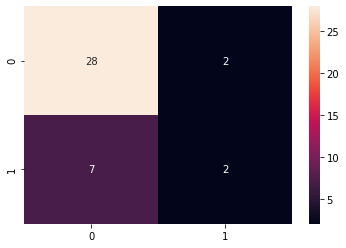

In [ ]:
# Appllying RANDOM FOREST CLASSIFIER
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_valid)

print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

y_pred = model_rf.predict(x_test)


In [ ]:

#Prepare our Submission file
my_submission = pd.DataFrame({'Application ID':Application_id, 'default_status':y_pred})
my_submission.to_csv('submission_ayanlola.csv', index=False)

ValueError: ignored